# Part II - Communicating Data Findings
## by Habib Khair

## Investigation Overview


> The goal of this presentation to investegate relationships between loan amounts, monthly payments, APRs, and loan terms.I noticed that most borrowers tend to have monthly payments between 100-200 USD, which seems to be a common repayment range. There’s also a positive correlation between the loan amount and monthly payments—larger loans generally mean higher monthly payments. Interestingly, borrowers with larger loan amounts often receive lower APRs, likely due to stronger credit profiles. Additionally, shorter-term loans (12 months) are less common and usually come with smaller loan amounts and higher APRs, while longer-term loans (60 months) are more frequent for larger amounts and typically come with lower rates. 


## Dataset Overview and Executive Summary

> The dataset provides insights into loan amounts, monthly payments, APRs, loan terms, and borrower profiles. It shows that most borrowers make monthly payments between 100-200 USD, with larger loans leading to higher payments. Borrowers with larger loans tend to have lower APRs, likely due to better credit profiles. Shorter-term loans (12 months) are associated with smaller amounts and higher APRs, while longer-term loans (60 months) typically have larger amounts and lower rates. These trends help us understand the relationships between loan conditions and borrower behavior.


In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('loan.csv')

## The monthly distribution of loan payments among borrowers?

> The skewed nature suggests that a large portion of borrowers take on smaller loans or have longer loan terms with lower payments, while fewer borrowers have very high monthly loan obligations.The highest frequency occurs around 100- 200, indicating that most loans fall within this range.

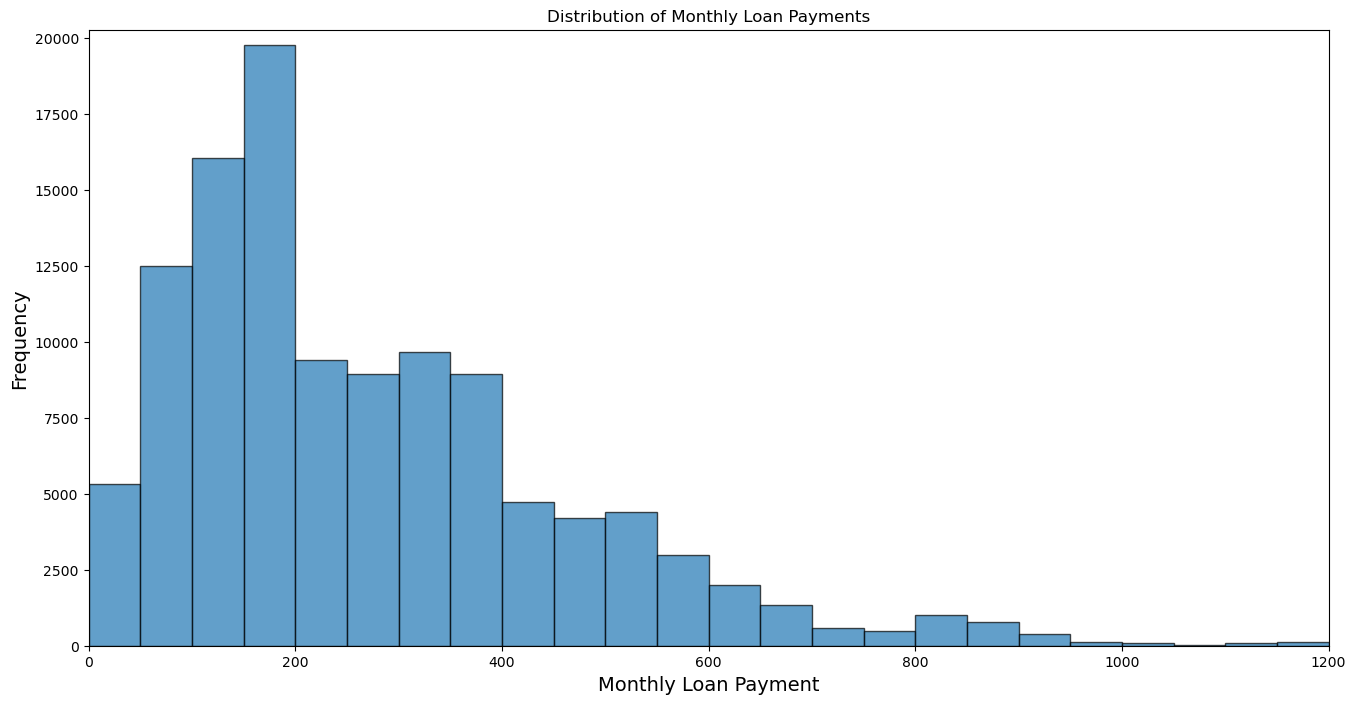

In [16]:
def myhistplot(data, x, bin_width, percentile=1.0, title='Histogram'):
    # Define bins based on bin width
    in_bins = np.arange(data[x].min(), data[x].max() + bin_width, bin_width)
    
    # Create a figure with larger size
    plt.figure(figsize=(16, 8))  # Increased figure size
    
    # Plot histogram
    plt.hist(data[x], bins=in_bins, edgecolor='black', alpha=0.7)
    
    # Set x-axis limits
    plt.xlim(0, 1)
    
    # Adjust y-axis limit to show full data
    y_max = np.histogram(data[x], bins=in_bins)[0].max()  # Get max frequency
    plt.ylim(0, y_max + 500)  # Add some space above max frequency for better visibility
    
    # Label axes and title
    plt.xlabel(x, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(title, fontsize=16)
    
# Create histogram for monthly payments
myhistplot(data=loan, x='MonthlyLoanPayment', bin_width=50, percentile=1.0, title='Distribution of Monthly Loan Payments')

# Set x-axis limit
plt.xlim(0, 1200)

# Add axis labels and title
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Loan Payments');

## The impact the monthly loan payment on the original loan amount 

> there is a positive correlation between the monthly payment and the loan amount.
Bigger loans mean higher monthly payments—that's a clear positive correlation. As loan amounts go up, so do the payments, which makes sense for budgeting and affordability.

Text(0, 0.5, 'Monthly Loan Payment (USD) ')

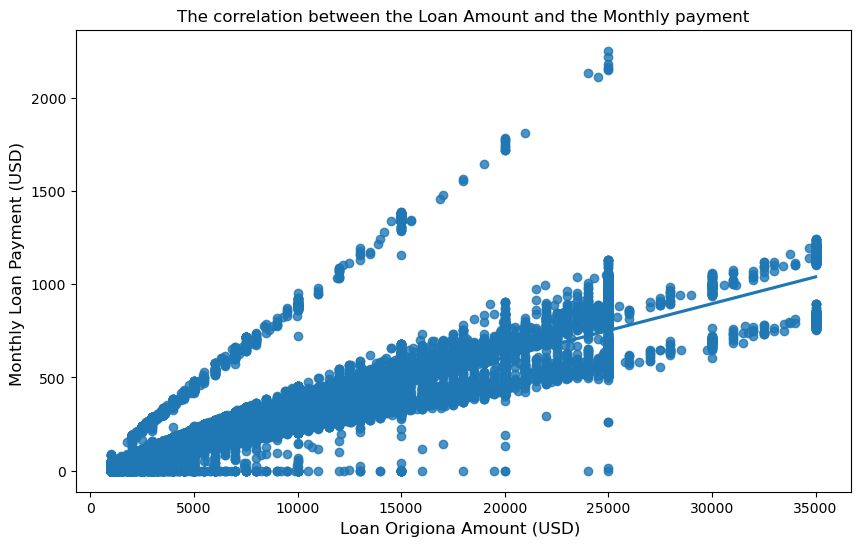

In [32]:
# Create a regression plot to visualize the relationship between Loan Amount and Monthly Payment
plt.figure(figsize=(10,6))
sns.regplot(data = loan, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment',  color="tab:blue")
# Add a title, axis labels, and set the font size for labels
plt.title('The correlation between the Loan Amount and the Monthly payment')
plt.xlabel('Loan Origiona Amount (USD) ', fontsize=12)
plt.ylabel('Monthly Loan Payment (USD) ', fontsize=12)              

## The impact of APR change as loan amounts increase for different loan terms

> Borrowers with larger loan amounts tend to get lower APRs, likely because they have better credit profiles. Shorter-term loans (12 months) are less common and usually come with smaller loan amounts and higher APRs, while longer-term loans (60 months) are more frequent for larger amounts with lower rates.

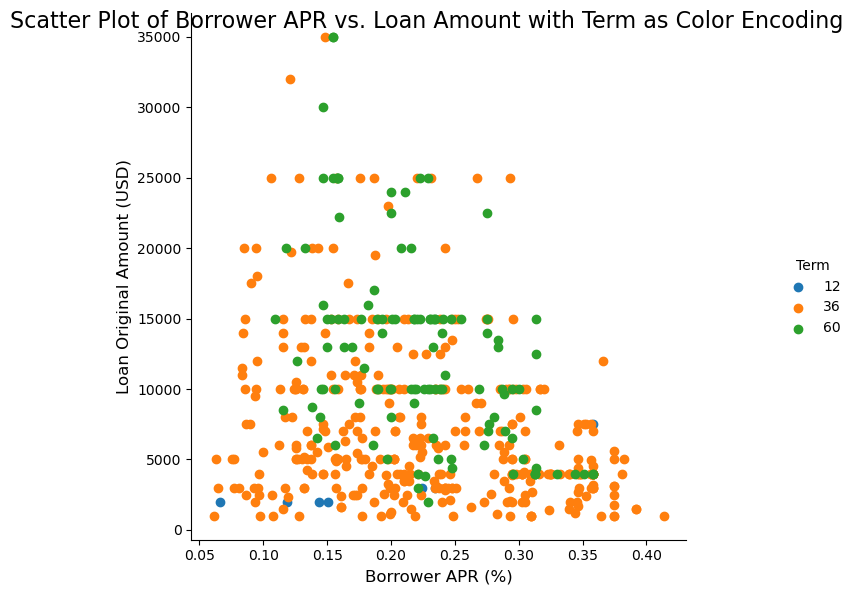

In [58]:
# Choose 500 random observations from the loan dataset
loan_sample = loan.sample(500)
#Creating a scatter plot faced grid for multivariate variables of BorrowerAPR, LoanOriginalAmount and Term with Term as color encoding
g = sns.FacetGrid(data = loan_sample, hue = 'Term', height = 6)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount')
# Add a title and axis labels
g.set_axis_labels('Borrower APR (%)', 'Loan Original Amount (USD)', fontsize=12)
g.fig.suptitle('Scatter Plot of Borrower APR vs. Loan Amount with Term as Color Encoding', fontsize=16)
# Add a legend for the color encoding
g.add_legend();